In [27]:
import os  
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-streaming-kafka-0-8_2.11:2.0.2 pyspark-shell' 


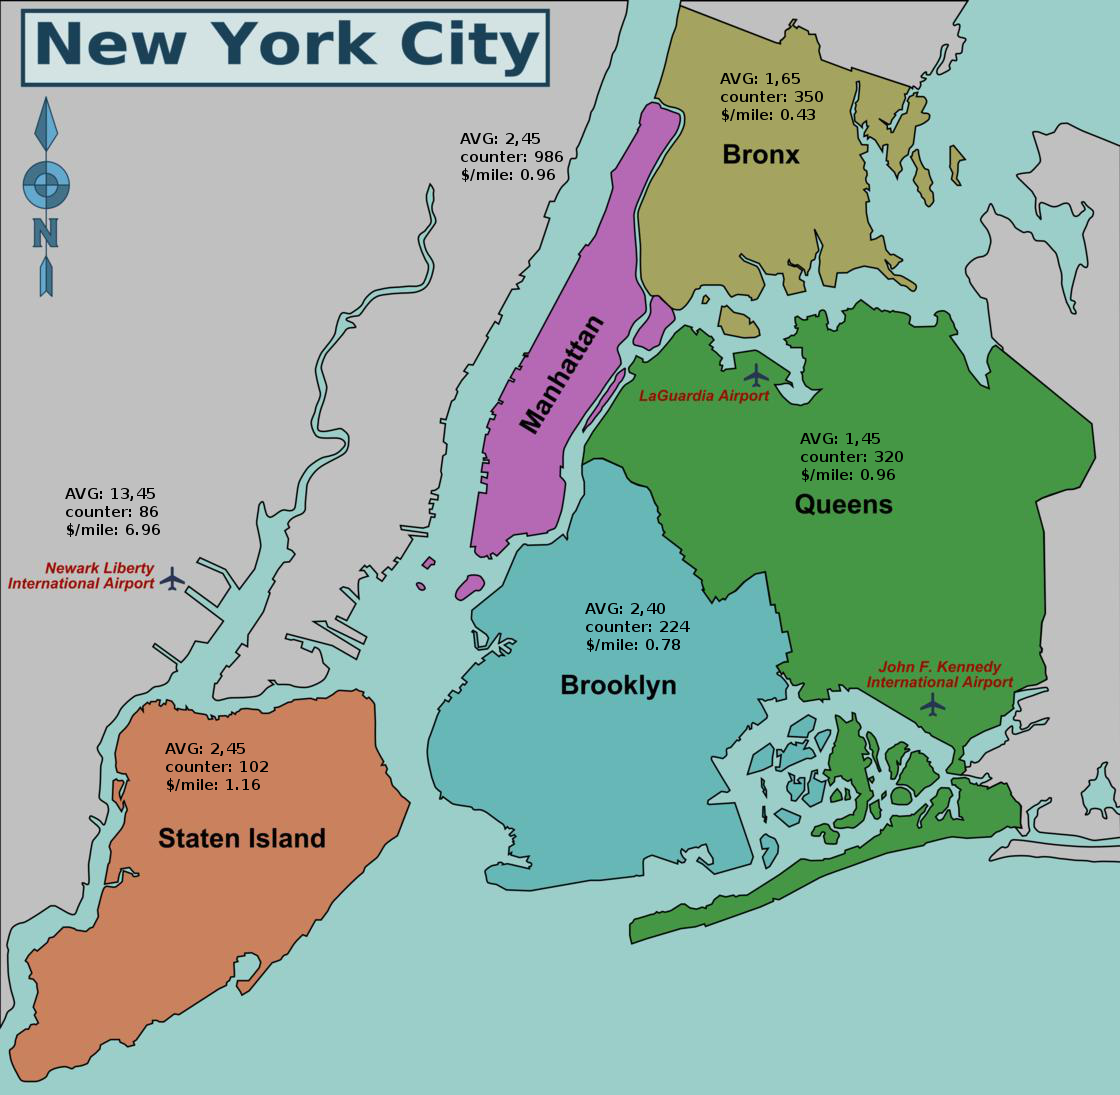

In [23]:
import PIL
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import HTML
from io import BytesIO
from base64 import b64encode

# these variables should be the output of the Spark SQL queries instead of static strings
newark = "AVG: 13,45 \ncounter: 86\n$/mile: 6.96"
staten_island = "AVG: 2,45 \ncounter: 102\n$/mile: 1.16"
queens = "AVG: 1,45 \ncounter: 320\n$/mile: 0.96"
manhattan = "AVG: 2,45 \ncounter: 986\n$/mile: 0.96"
bronx = "AVG: 1,65 \ncounter: 350\n$/mile: 0.43"
brooklyn = "AVG: 2,40 \ncounter: 224\n$/mile: 0.78"
pil_im = Image.open('nycborough.jpeg')
b = BytesIO()  


# here we set the font of the text on the image
font = ImageFont.truetype(font="/usr/share/fonts/dejavu/DejaVuSans-Bold.ttf", size=15)


draw = ImageDraw.Draw(pil_im)
draw = ImageDraw.Draw(pil_im).text((585,600), brooklyn, (0,0,0), font=font)
draw1 = ImageDraw.Draw(pil_im).text((65, 485), newark,(0,0,0), font=font)
draw2 = ImageDraw.Draw(pil_im).text((800,430), queens, (0,0,0), font=font)
draw3 = ImageDraw.Draw(pil_im).text((720,70), bronx, (0,0,0), font=font)
draw4 = ImageDraw.Draw(pil_im).text((165, 740), staten_island,(0,0,0), font=font)
draw5 = ImageDraw.Draw(pil_im).text((460, 130), manhattan,(0,0,0), font=font)

# output in a html
pil_im.save(b, format='png')
HTML("<img src='data:image/png;base64,{0}'/>".format(b64encode(b.getvalue()).decode('utf-8')))

In [ ]:
# a simple approach/try to read a .csv-file

import csv as csv
import numpy as np
import pandas as pd

data = []


readdata = csv.reader(open("Desktop/yellow_tripdata_2017-01.csv", 'r'))
#the rows itselfs are lists in csv.reader
for row in readdata:
    data.append(row)


Header = data[0]
data.pop(0)
print(Header)
sum_tip_amount = 0.0
sum_trip_distance = 0.0
for i in range(1, len(data)-1):
    payment_type = int(data[i][9])
    if payment_type == 1:
        sum_trip_distance += float(data[i][4])
        sum_tip_amount += float(data[i][13])
   
        
print(sum_tip_amount/sum_trip_distance)
del readdata, data
#pandaria = pd.DataFrame(data=data, columns=Header)
#print(pandaria)

In [ ]:
import os  
import csv as csv
import numpy as np
import kafka
from kafka import SimpleProducer, SimpleClient
#from pyspark.sql import SQLContext
#from pyspark.sql.types import *
#from pyspark import SparkContext
#from pyspark.streaming import StreamingContext


#conf = SparkConf().setMaster("local[2]").setAppName("Streamer")
#sc = SparkContext(conf=conf)

#readdata = csv.reader(open("Desktop/yellow_tripdata_2017-01.csv", 'r'))

#sqlContext = SQLContext(sc)
#customSchema = StructType([ \
#    StructField("payment_type", IntegerType(), True), \
#    StructField("tip_amount", FloatType(), True)])

#df = sqlContext.read \
#    .format('com.databricks.spark.csv') \
#    .options(header='true') \
#    .load('Desktop/yellow_tripdata_2017-01.csv', schema = customSchema)

#df.select('payment_type', 'tip_amount').write \
#    .format('com.databricks.spark.csv') \
#    .save('Destop/teil.csv')

TOPIC = "test-topic"

# To send messages synchronously
client = SimpleClient('localhost:9092')
producer = SimpleProducer(client, async=False)

# Note that the application is responsible for encoding messages to type bytes
producer.send_messages(TOPIC, 'AVG: 2,6\ncount: 300')
producer.send_messages(TOPIC, 'AVG: 2,5\ncount: 400')
producer.send_messages(TOPIC, 'AVG: 2,8\ncount: 800')



#ssc.start()             # Start the computation
#ssc.awaitTermination()  # Wait for the computation to terminate

# To wait for acknowledgements
# ACK_AFTER_LOCAL_WRITE : server will wait till the data is written to
#                         a local log before sending response
# ACK_AFTER_CLUSTER_COMMIT : server will block until the message is committed
#                            by all in sync replicas before sending a response
#producer = SimpleProducer(client,
#                          async=False,
#                          req_acks=SimpleProducer.ACK_AFTER_LOCAL_WRITE,
#                          ack_timeout=2000,
#                          sync_fail_on_error=False)


In [ ]:


from kafka import SimpleProducer, SimpleClient, SimpleConsumer

TOPIC = "test-topic"
# To consume messages
client = SimpleClient('localhost:9092')
consumer = SimpleConsumer(client, None, TOPIC)

for message in consumer:
    # message is raw byte string -- decode if necessary!
    # e.g., for unicode: `message.decode('utf-8')`
    print(message.message.value)


# Use multiprocessing for parallel consumers
#from kafka import MultiProcessConsumer

# This will split the number of partitions among two processes
#consumer = MultiProcessConsumer(client, None, TOPIC, num_procs=2)

# This will spawn processes such that each handles 2 partitions max
#consumer = MultiProcessConsumer(client, None, TOPIC,
#                                partitions_per_proc=2)

#for message in consumer:
#    print(message.value)

#for message in consumer.get_messages(count=5, block=True, timeout=4):
#    print(message.value)

consumer.close()

In [ ]:
# a try to import Spark without crushing the kernel
#    Spark
from pyspark import SparkContext  
#    Spark Streaming
from pyspark.streaming import StreamingContext  
#    Kafka
from pyspark.streaming.kafka import KafkaUtils  
#    json parsing
import json  

In [ ]:
!echo $PATH

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} kafka-python

In [61]:
import sys
!sudo {sys.executable} -m pip install kafka-python

  Using cached kafka_python-1.3.5-py2.py3-none-any.whl


In [1]:
!echo hallo

hallo



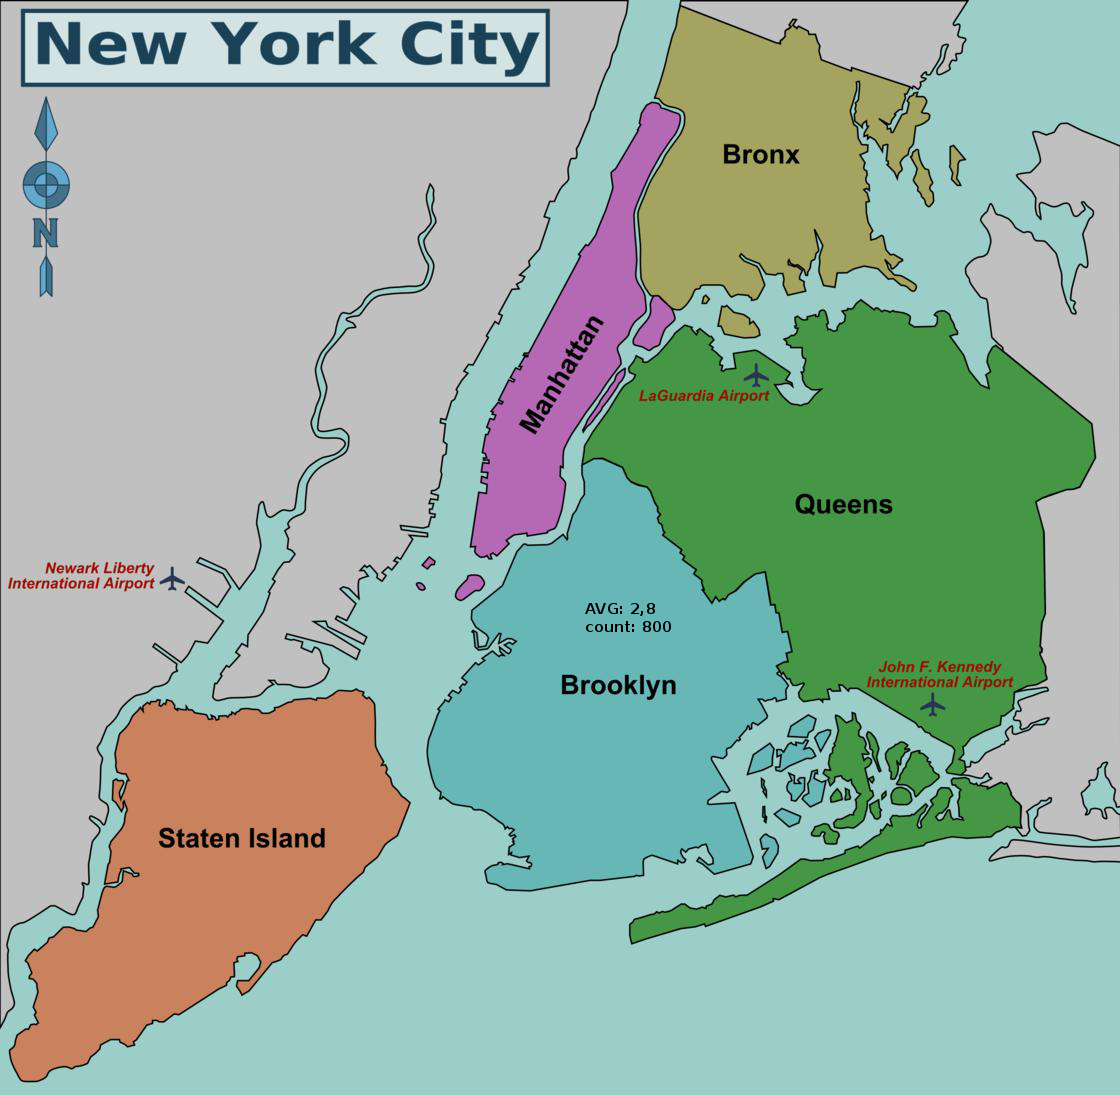

In [ ]:
################# image processing stuff ##########
import PIL
import sys
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.core.display import HTML, display
from IPython.display import clear_output
from io import BytesIO
from base64 import b64encode
import time

imgCoordinates = [
    (585,600), 
    (65, 525) 
]

def drawData( values ):
    # init
    font = ImageFont.truetype(font="/usr/share/fonts/dejavu/DejaVuSans-Bold.ttf", size=15)
    pil_im = Image.open('nycborough.jpeg')
    b = BytesIO()  
    
    # add text for each coordinate given! like the example above
    ImageDraw.Draw(pil_im)
    for i in range(len(values)):
        print(values[i])
        draw = ImageDraw.Draw(pil_im).text(imgCoordinates[i], values[i], (0,0,0), font=font)

    pil_im.save(b, format='png')
    
    clear_output()
    display(HTML("<img src='data:image/png;base64,{0}'/>".format(b64encode(b.getvalue()).decode('utf-8'))))
    return;

######## Kafka consumer part #########

# we took the example from http://kafka-python.readthedocs.io/en/master/simple.html

from kafka import SimpleProducer, SimpleClient, SimpleConsumer
import time


TOPIC = "test-topic"

client = SimpleClient('localhost:9092')
consumer = SimpleConsumer(client, None, TOPIC)
for message in consumer:
    
    drawData([message.message.value])
    
    # here we set the redraw time at 5 seconds, so you can see that the picture actually redraw it 
    # after a new message
    time.sleep(5)
    


client.close()